In [1]:
import spacedecomp
from spacedecomp.kernels import RBF
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch.distributions import MultivariateNormal

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

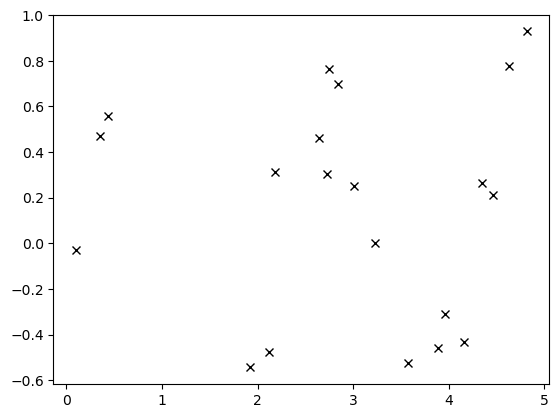

In [3]:
np.random.seed(0)
N = 20
X = 5*np.random.rand(N)
y = 0.5 * np.sin(3 * X) + 0.2*np.random.randn(N)

plt.plot(X, y, "kx")

In [27]:
Nsamples = 1000
Xtest = np.linspace(-0.5, 5.5, Nsamples)

(-8.0, 8.0)

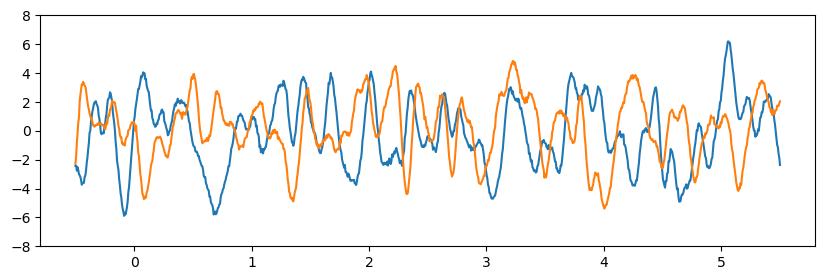

In [28]:
kernel = RBF(
    variance=6.0, lengthscale= 0.05 )

gpr = spacedecomp.GP(X[:,None], y, kernel, noise=0.1)
cov = kernel.predict(X=Xtest[:, None]) + (gpr.noise**2)*torch.eye(Nsamples)
samples = MultivariateNormal(torch.zeros(Nsamples),cov).sample((2,))

plt.figure(figsize=(10, 3))
plt.plot(Xtest, samples[0])
plt.plot(Xtest, samples[1])
plt.ylim((-8, 8))

(-8.0, 8.0)

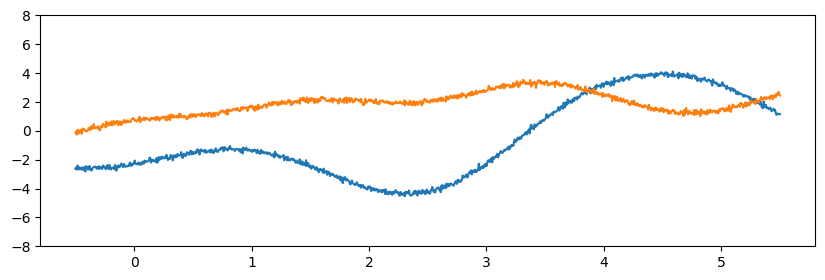

In [29]:
kernel = RBF(
    variance=6.0, lengthscale= 1 )

gpr = spacedecomp.GP(X[:,None], y, kernel, noise=0.1)
cov = kernel.predict(X=Xtest[:, None]) + (gpr.noise**2)*torch.eye(Nsamples)
samples = MultivariateNormal(torch.zeros(Nsamples),cov).sample((2,))

plt.figure(figsize=(10, 3))
plt.plot(Xtest, samples[0])
plt.plot(Xtest, samples[1])
plt.ylim((-8, 8))

(-8.0, 8.0)

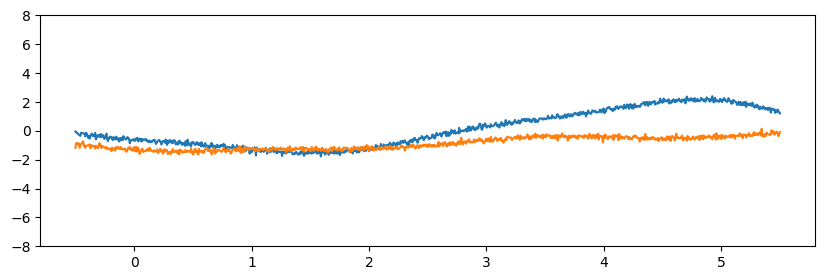

In [30]:
kernel = RBF(
    variance=1, lengthscale= 1 )

gpr = spacedecomp.GP(X[:,None], y, kernel, noise=0.1)
cov = kernel.predict(X=Xtest[:, None]) + (gpr.noise**2)*torch.eye(Nsamples)
samples = MultivariateNormal(torch.zeros(Nsamples),cov).sample((2,))

plt.figure(figsize=(10, 3))
plt.plot(Xtest, samples[0])
plt.plot(Xtest, samples[1])
plt.ylim((-8, 8))